# Introduction

In this project we are finding the cluster in which each mouse is from according to the protein level expressions.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:

* c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)

* c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)

* c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)

* c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

* t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

* t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)

* t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)

* t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The above mentioned are the target clusters.

# Data cleaning

In [165]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings

warnings.filterwarnings('ignore')

In [166]:
data = pd.read_csv('Data_Cortex_Nuclear.csv')
df = data.copy()

The data looks like this:

In [167]:
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1  0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2  0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3  0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4  0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.296927  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366   
1  0.281319  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659   
2  0.281710  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329   
3  0.313832  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705   
4  0.277964  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.416289  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526   
1  0.400364  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727   
2  0.399847  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614   
3  0.385639  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536   
4  0.367531  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.319677  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539   
1  0.304419  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560   
2  0.311747  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005   
3  0.279218  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211   
4  0.273667  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755   

      P38_N   pMTOR_N   DSCR1_N  ...    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N  \
0  0.335336  0.825192  0.576916  ...  0.182150  0.842725  0.192608  1.443091   
1  0.324835  0.761718  0.545097  ...  0.182086  0.847615  0.194815  1.439460   
2  0.324852  0.757031  0.543620  ...  0.184388  0.856166  0.200737  1.524364   
3  0.330121  0.746980  0.546763  ...  0.161768  0.760234  0.184169  1.612382   
4  0.313415  0.691956  0.536860  ...  0.160200  0.768113  0.185718  1.645807   

     CDK5_N      S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N  \
0  0.294700  0.354605  1.339070      0.170119  0.159102  0.188852  0.106305   
1  0.294060  0.354548  1.306323      0.171427  0.158129  0.184570  0.106592   
2  0.301881  0.386087  1.279600      0.185456  0.148696  0.190532  0.108303   
3  0.296382  0.290680  1.198765      0.159799  0.166112  0.185323  0.103184   
4  0.296829  0.309345  1.206995      0.164650  0.160687  0.188221  0.104784   

    ERBB4_N    nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N  \
0  0.144989  0.176668  0.125190  0.115291  0.228043  0.142756  0.430957   
1  0.150471  0.178309  0.134275  0.118235  0.238073  0.142037  0.457156   
2  0.145330  0.176213  0.132560  0.117760  0.244817  0.142445  0.510472   
3  0.140656  0.163804  0.123210  0.117439  0.234947  0.145068  0.430996   
4  0.141983  0.167710  0.136838  0.116048  0.255528  0.140871  0.481227   

    P3525_N  pCASP9_N   PSD95_N    SNCA_N  Ubiquitin_N  pGSK3B_Tyr216_N  \
0  0.247538  1.603310  2.014875  0.108234     1.044979         0.831557   
1  0.257632  1.671738  2.004605  0.109749     1.009883         0.849270   
2  0.255343  1.663550  2.016831  0.108196     0.996848         0.846709   
3  0.251103  1.484624  1.957233  0

To see how many null values are there in the data set, we fetch the info.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [169]:
df.shape

(1080, 82)

We have 82 columns and if 90% entries of a columns are null values then remove it.

In [200]:
df1 = df.dropna(how='any',axis=1,thresh=df.shape[0]*0.9)

So the remaining dataset has the dimension of, 

In [171]:
df1.shape

(1080, 77)

In [172]:
pd.set_option('display.max_row',df1.shape[0])
pd.set_option('display.max_column',df1.shape[1])

The number of null values in each column is given by,

In [173]:
df1.isnull().sum().sort_values(ascending=False)

pCFOS_N            75
ELK_N              18
Bcatenin_N         18
MEK_N               7
MTOR_N              3
ERK_N               3
GSK3B_N             3
JNK_N               3
RSK_N               3
APP_N               3
SOD1_N              3
AMPKA_N             3
CREB_N              3
pMTOR_N             3
DSCR1_N             3
DYRK1A_N            3
NR2B_N              3
pNUMB_N             3
RAPTOR_N            3
TIAM1_N             3
pP70S6_N            3
P38_N               3
TRKA_N              3
CAMKII_N            3
pERK_N              3
ITSN1_N             3
BDNF_N              3
NR1_N               3
BRAF_N              3
pAKT_N              3
pBRAF_N             3
pCAMKII_N           3
pCREB_N             3
pELK_N              3
NR2A_N              3
pJNK_N              3
pMEK_N              3
pNR1_N              3
pNR2A_N             3
pNR2B_N             3
pPKCAB_N            3
pRSK_N              3
PKCA_N              3
AKT_N               3
SHH_N               0
P3525_N   

We fill the null entries with the mean of the corresponding column.

In [174]:
df2 = df1.fillna(df1.mean())

Now we confirm that there are no columns duplicated.

In [175]:
print(df2[df2.duplicated()])

Empty DataFrame
Columns: [MouseID, DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, pS6_N, pCFOS_N, SYP_N, CaNA_N, Genotype, Treatment, Behavior, class]
Index: []


Now the numerical values of the dataset can be described as,

In [176]:
df2.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249015     0.251290     0.049314     0.346810     0.931802   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288163     0.473669     0.287650     2.059152     3.160287   
50%       0.366540     0.566365     0.316703     2.297269     3.763306   
75%       0.487574     0.697500     0.348039     2.528035     4.425107   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.233168     0.181846     3.537109     0.212574     1.428682   
std       0.041577     0.027004     1.293368     0.032542     0.466254   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
25%       0.205821     0.164619     2.479861     0.190828     1.206389   
50%       0.231246     0.182270     3.329624     0.210681     1.356368   
75%       0.257225     0.197226     4.480652     0.234558     1.560931   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.545904     0.313505     0.317939     0.275033     0.825813   
std       0.344829     0.051906     0.052164     0.046099     0.117805   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
25%       0.337486     0.281530     0.281850     0.244294     0.743594   
50%       0.444223     0.321266     0.313028     0.277176     0.821531   
75%       0.663173     0.348692     0.352272     0.303355     0.898339   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N        AKT_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.726933     1.561965     1.525338     0.442848     0.682236   
std       0.187752     0.270361     0.481110     0.066579     0.127257   
min       0.281285     0.301609     0.567840     0.095942     0.064421   
25%       0.591311     1.381308     1.168648     0.404152     0.597317   
50%       0.720592     1.563239     1.368844     0.440638     0.682236   
75%       0.847276     1.748498     1.881237     0.481807     0.758909   
max       1.412750     2.723965     3.061387     0.650962     1.182175   

            BRAF_N     CAMKII_N       CREB_N        ELK_N        ERK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.378519     0.363357     0.180492     1.173400     2.474492   
std       0.216087     0.052279     0.026334     0.332973     0.652488   
min       0.143894     0.212960     0.113636     0.497695     1.131796   
25%       0.264356     0.330887     0.161867     0.947889     1.993693   
50%       0.326730     0.360483     0.179615     1.102846     2.402699   
75%       0.412716     0.393814     0.195701     1.318167     2.870697   
max       2.133416     0.586245     0.319558     2.802948     5.198404   

           GSK3B_N        JNK_N        MEK_N       TRKA_N        RSK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      1.172603     0.241644     0.272789     0.693180     0.168417   
std       0.244411     0.033854     0.040942     0.120657     0.028099   
min       0.151124     0.046298     0.147201     0.198743     0.107394   
25%       1.023321     0.220425     0.247322     0.617329     0.149639   
50%       1.160390     0.244819     0.273101     0.704874     0.166700   
75%       1.309387     0.263240     0.300476     0.774031     0.184472   
max       2.475751     0.387191     0.415408     1.001623     0.305136   

        

and the categorical values of the data is described as,

In [177]:
df2.describe(include='object')

MouseID Genotype  Treatment Behavior   class
count     1080     1080       1080     1080    1080
unique    1080        2          2        2       8
top      309_1  Control  Memantine      S/C  c-CS-m
freq         1      570        570      555     150

These are the different entries in the categorical columns:

In [178]:
print(df2['Genotype'].value_counts())
print(df2['Treatment'].value_counts())
print(df2['Behavior'].value_counts())
print(df2['class'].value_counts())

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64
Memantine    570
Saline       510
Name: Treatment, dtype: int64
S/C    555
C/S    525
Name: Behavior, dtype: int64
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


`MouseID` is not required as a feature. Seperate X as features except `class` and y as `class`.

In [179]:
X = df2.drop(['MouseID','class'],axis=1)
y1 = df2[['class']]

Encode the categorical values of X

In [180]:
X = pd.get_dummies(data=X,columns=["Treatment","Behavior", "Genotype"])

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DYRK1A_N             1080 non-null   float64
 1   ITSN1_N              1080 non-null   float64
 2   BDNF_N               1080 non-null   float64
 3   NR1_N                1080 non-null   float64
 4   NR2A_N               1080 non-null   float64
 5   pAKT_N               1080 non-null   float64
 6   pBRAF_N              1080 non-null   float64
 7   pCAMKII_N            1080 non-null   float64
 8   pCREB_N              1080 non-null   float64
 9   pELK_N               1080 non-null   float64
 10  pERK_N               1080 non-null   float64
 11  pJNK_N               1080 non-null   float64
 12  PKCA_N               1080 non-null   float64
 13  pMEK_N               1080 non-null   float64
 14  pNR1_N               1080 non-null   float64
 15  pNR2A_N              1080 non-null   f

y is also encoded manually since there are only 8 classes. How these 8 classes are distributed is given below:

In [182]:
classes = {"class":     {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                            't-SC-s':6, 't-CS-s':7}}
y = y1.replace(classes)
y = pd.DataFrame(y)
y.reset_index()
y['class'].value_counts()

0    150
1    150
2    135
3    135
4    135
5    135
6    135
7    105
Name: class, dtype: int64

Now we scale the the X columns and the results are these:

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

0         1         2         3         4         5         6   \
0  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   

         7         8         9         10        11        12        13  \
0  0.168257  0.617322  0.232553  0.157643  0.576167  0.747688  0.598504   
1  0.154925  0.590173  0.205362  0.159721  0.559556  0.688545  0.559598   
2  0.153485  0.607102  0.199194  0.154554  0.541938  0.670905  0.560573   
3  0.132074  0.486945  0.205135  0.127028  0.554293  0.657048  0.640641   
4  0.129086  0.410194  0.189152  0.117572  0.532161  0.608970  0.551236   

         14        15        16        17        18        19        20  \
0  0.574775  0.286697  0.650637  0.698164  0.622784  0.711198  0.136915   
1  0.502766  0.270688  0.587926  0.591606  0.629311  0.689095  0.128911   
2  0.554483  0.283848  0.590443  0.581558  0.669753  0.670907  0.128651   
3  0.413245  0.211238  0.522319  0.627585  0.687775  0.593408  0.121509   
4  0.401706  0.200364  0.486489  0.579839  0.698127  0.557701  0.112407   

         21        22        23        24        25        26        27  \
0  0.419649  0.317149  0.593715  0.627907  0.596269  0.640167  0.643070   
1  0.383669  0.291583  0.548032  0.578736  0.584234  0.614355  0.586180   
2  0.415579  0.292676  0.549983  0.599925  0.580790  0.625756  0.613502   
3  0.401866  0.319599  0.342080  0.452058  0.545716  0.625528  0.492220   
4  0.381348  0.297196  0.358746  0.433909  0.519977  0.599623  0.471524   

         28        29        30        31        32        33        34  \
0  0.766146  0.295596  0.549817  0.747441  0.092035  0.541196  0.152338   
1  0.724593  0.251840  0.491969  0.701976  0.075589  0.467650  0.137451   
2  0.730384  0.270560  0.472444  0.710718  0.076445  0.470688  0.137475   
3  0.667283  0.277208  0.440780  0.536330  0.076936  0.479533  0.144945   
4  0.627685  0.239874  0.410395  0.519186  0.067645  0.436522  0.121261   

         35        36        37  ...        40        41        42        43  \
0  0.687269  0.553922  0.467278  ...  0.436170  0.506018  0.163368  0.323059   
1  0.621033  0.512117  0.409897  ...  0.383101  0.447496  0.145594  0.322736   
2  0.616142  0.510175  0.375653  ...  0.356363  0.432379  0.125773  0.334325   
3  0.605654  0.514305  0.338199  ...  0.402786  0.422989  0.267936  0.220414   
4  0.548237  0.501294  0.283304  ...  0.353712  0.374357  0.262839  0.212521   

         44        45        46        47        48        49        50  \
0  0.373254  0.604516  0.303363  0.178458  0.324085  0.402810  0.083584   
1  0.376914  0.618918  0.302059  0.177452  0.324004  0.386524  0.084514   
2  0.383316  0.657565  0.332565  0.189744  0.369553  0.373234  0.094486   
3  0.311501  0.549444  0.364189  0.181101  0.231762  0.333033  0.076248   
4  0.317400  0.559551  0.376199  0.181805  0.258720  0.337126  0.079697   

         51        52        53        54        55        56        57  \
0  0.327870  0.690257  0.426816  0.412721  0.477834  0.057168  0.228825   
1  0.326426  0.664894  0.429952  0.463251  0.488028  0.075103  0.251911   
2  0.312439  0.700212  0.448652  0.415863  0.475009  0.071718  0.248192   
3  0.338264  0.669358  0.392700  0.372772  0.397939  0.053257  0.245676   
4  0.330219  0.686524  0.410187  0.385008  0.422195  0.080162  0.234762   

         58        59        60        61        62        63        64  \
0  0.531163  0.151103  0.242608  0.169702  0.432843  0.483783  0.044770   
1  0.576828  0.149555  0.285860  0.212421  0.472327  0.477640  0.054452   
2  0.607535  0.150434  0.373879  0.202733  0.467603  0.484953  0.044526   
3  0.562594  0.156083  0.242672  0.184790  0.364359  0.449304  0.119259

In [184]:
df_scaled.shape

(1080, 78)

# Models

## Kmeans

As a first step we look at the elbow method and see what is the right amount of clustering.

In [185]:
from sklearn.cluster import KMeans

In [186]:
wcss=[]

for k in range(1,13):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,13), wcss, linewidth=2, color='blue', marker = '8')
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.title('Elbow method for Inertia', fontsize=18)
plt.show()

Looking at the Elbow we can assume that 8 is a good number for the cluster number.

## Gridsearch

We now try to grid search the parameters for Principal Component Analysis and a Kmeans on top of it.

In [188]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

grid_pca = PCA()
grid_kmeans = KMeans(init ='k-means++')
pipe = Pipeline([('gridpca', grid_pca),('gridkmeans', grid_kmeans)])

param_grid = {
    "gridpca__n_components": [2,3,4,5,6,7,8,9,10],
    "gridkmeans__n_clusters": [4,5,6,7,8,9,10]
}
gridsearch = GridSearchCV(pipe, param_grid, n_jobs=2)

gridsearch = gridsearch.fit(df_scaled)

gridsearch.best_estimator_

Pipeline(steps=[('gridpca', PCA(n_components=2)),
                ('gridkmeans', KMeans(n_clusters=10))])

## KMeans(10) with PCA(2)

From the gridsearch it is suggested to use 10 number of cluster and PCA with 2 components.
We execute this and try to see how the clustering works.

In [189]:
pca1 = PCA(n_components=2)
df_pca1 = pca1.fit(df_scaled).transform(df_scaled)

In [190]:
km1 = KMeans(n_clusters=10,init ='k-means++')
km1 = km1.fit(df_pca1)

In [191]:
kmpca1_label = km1.predict(df_pca1)
kmpca1_label = pd.DataFrame(data=kmpca1_label, columns=['kmpca1_label'])

In [192]:
df_kmpca1 = pd.DataFrame(df_pca1, columns =['Component 1', 'Component 2'])

In [193]:
df_kmpca1 = pd.concat([df_kmpca1, kmpca1_label,y], axis=1)

In [194]:
plt.figure(figsize=(16, 6)) 
plt.subplot(1,2,1)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_kmpca1, hue = 'class', palette='BrBG')
plt.title('Original Data', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.subplot(1,2,2)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_kmpca1, hue = 'kmpca1_label', palette='BrBG')
plt.title('K-means with PCA(2)', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()

## KMeans(8) with PCA(2)

From the above plot we tend to use our inference from the Elbow method and we change the cluster number to 8.

In [195]:
km2 = KMeans(n_clusters=8,init ='k-means++')
km2 = km2.fit(df_pca1)

In [196]:
kmpca2_label = km2.predict(df_pca1)
kmpca2_label = pd.DataFrame(data=kmpca2_label, columns=['kmpca2_label'])

In [197]:
df_kmpca2 = pd.DataFrame(df_pca1, columns =['Component 1', 'Component 2'])
df_kmpca2 = pd.concat([df_kmpca2, kmpca2_label,y], axis=1)

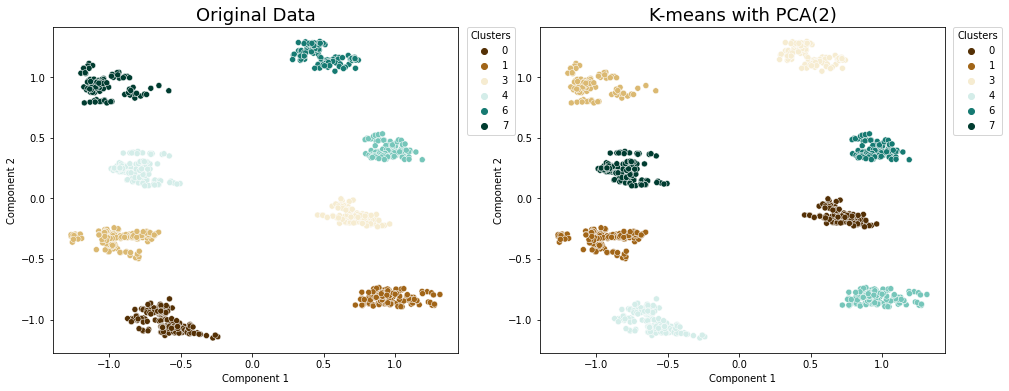

In [198]:
plt.figure(figsize=(16, 6)) 
plt.subplot(1,2,1)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_kmpca2, hue = 'class', palette='BrBG')
plt.title('Original Data', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.subplot(1,2,2)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_kmpca2, hue = 'kmpca2_label', palette='BrBG')
plt.title('K-means with PCA(2)', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()

# Conclusion

From the two clustering methods, it is clear that the KMeans(8) with PCA(2) is the best method as we can compare it visually.